In [8]:
import tensorflow as tf
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import gym

In [9]:
"""
Initialize environment
"""
env = gym.make('CartPole-v1')
state_shape = env.observation_space.shape[0]
num_actions = env.action_space.n
num_actions

2

2

In [10]:
"""
Build Policy Network
"""

input_layer = Input(shape=state_shape)
layer_1 = Dense(64, activation='relu')(input_layer)
layer_2 = Dense(64, activation='relu')(layer_1)
layer_3 = Dense(num_actions)(layer_2)
output_layer = tf.nn.softmax(layer_3)

policy_network = Model(inputs=input_layer, outputs=output_layer)

In [15]:
"""
Def the loss function
"""
class REINFORCE:
    def __init__(self, model, gamma = 0.98):
        self.model=model
        self.gamma=gamma
    
    def loss(self, states, actions, discounted_rewards):
        probs = self.model(np.array(states))
        mask = tf.one_hot(actions, num_actions)
        pi_a_s = tf.reduce_sum(probs * mask, axis=1)
        neg_log_policy = -1*tf.math.log(pi_a_s)
        loss = tf.reduce_sum(neg_log_policy * discounted_rewards)
        return loss

    def train_step(self, states, actions, discounted_rewards):
        optimizer = tf.keras.optimizers.Adam(lr=0.001)
        with tf.GradientTape() as tape:
            loss = self.loss(states, actions, discounted_rewards)
        grads = tape.gradient(loss, self.model.trainable_variables)
        optimizer.apply_gradients(zip(grads, self.model.trainable_variables))
        
    
    # Define a function for discounting and normalizing rewards, which returns the reward to go array
    def discount_and_normalize_rewards(self, episode_rewards):
        # Array for storing the episode rewards
        discounted_rewards = np.zeros_like(episode_rewards)
        # compute the discounted reward
        reward_to_go = 0.0
        for i in reversed(range(len(episode_rewards))):
            reward_to_go = reward_to_go*self.gamma + episode_rewards[i]
            discounted_rewards[i] = reward_to_go
        #Normalize and return
        discounted_rewards -= np.mean(discounted_rewards) # Baseline
        discounted_rewards /= np.std(discounted_rewards) # Varience reduction

        return discounted_rewards

In [16]:
RE = REINFORCE(model=policy_network)

In [17]:
def single_episode_run(model, env):
    episode_states, episode_actions, episode_rewards = [],[],[]
    done=False
    Return=0
    state=env.reset()
    while not done:
        episode_states.append(state)
        state = state.reshape([1,4])
        pi = RE.model(state)
        a = np.random.choice(np.array([0,1]),p=pi[0].numpy())
        episode_actions.append(a)
        next_state, reward, done, info = env.step(a)
        Return+=reward
        episode_rewards.append(reward)
        state=next_state
    rewards_to_go = RE.discount_and_normalize_rewards(episode_rewards)
    return episode_states, episode_actions, rewards_to_go, Return

In [18]:
num_iterations = 500
return_array = np.zeros(num_iterations)
returns_benchmark=0.0
for i in range(num_iterations):
    returns = np.zeros(8)
    episode_states, episode_actions, rewards_to_go, Return= single_episode_run(RE.model, env)
    return_array[i]=Return
    RE.train_step(episode_states, episode_actions, rewards_to_go)
    if Return > returns_benchmark:
        best_model=RE.model
    if i%50==0:
        print("Iteration:{}, Return:{}".format(i, Return))
        RE.model.save("PGAgent-v2-episode{}".format(i))
best_model.save("PGAgent-v2-best")

Iteration:0, Return:137.0
Iteration:0, Return:137.0
INFO:tensorflow:Assets written to: PGAgent-v2-episode0/assets
INFO:tensorflow:Assets written to: PGAgent-v2-episode0/assets
Iteration:50, Return:295.0
Iteration:50, Return:295.0
INFO:tensorflow:Assets written to: PGAgent-v2-episode50/assets
INFO:tensorflow:Assets written to: PGAgent-v2-episode50/assets
Iteration:100, Return:283.0
Iteration:100, Return:283.0
INFO:tensorflow:Assets written to: PGAgent-v2-episode100/assets
INFO:tensorflow:Assets written to: PGAgent-v2-episode100/assets
Iteration:150, Return:152.0
Iteration:150, Return:152.0
INFO:tensorflow:Assets written to: PGAgent-v2-episode150/assets
INFO:tensorflow:Assets written to: PGAgent-v2-episode150/assets
Iteration:200, Return:500.0
Iteration:200, Return:500.0
INFO:tensorflow:Assets written to: PGAgent-v2-episode200/assets
INFO:tensorflow:Assets written to: PGAgent-v2-episode200/assets
Iteration:250, Return:427.0
Iteration:250, Return:427.0
INFO:tensorflow:Assets written to: P

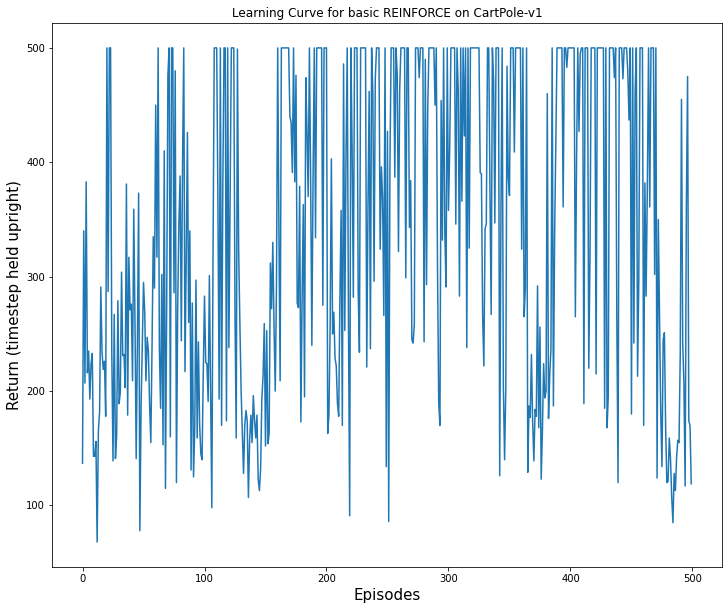

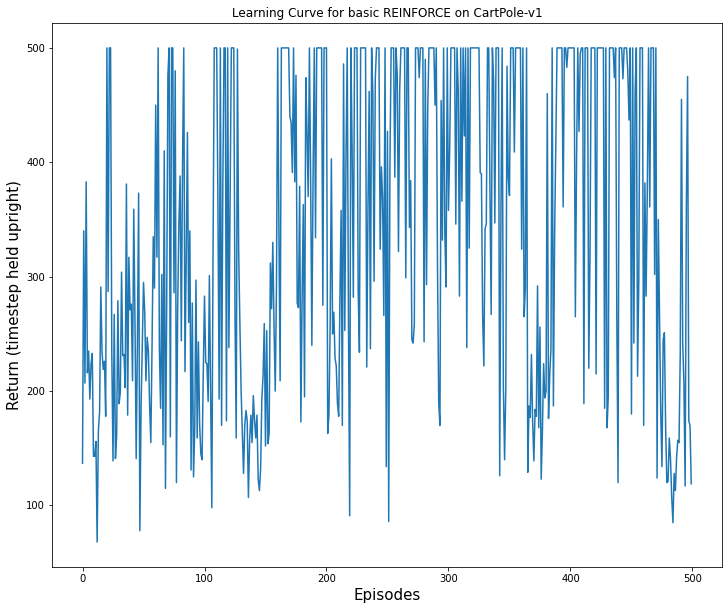

In [21]:
plt.figure(figsize=(12,10))
plt.plot(return_array)
plt.xlabel("Episodes", fontsize =15)
plt.ylabel("Return (timestep held upright)", fontsize=15)
plt.title("Learning Curve for basic REINFORCE on CartPole-v1")
plt.savefig("PGA_learningcurve-v2")

SyntaxError: unexpected EOF while parsing (<ipython-input-20-e2d94cbab579>, line 6)

SyntaxError: unexpected EOF while parsing (<ipython-input-20-e2d94cbab579>, line 6)